# EDA 1
- The purpose of this notebook is to explore some of the properties of the TF-IDF features that result from the preprocessed data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

In [3]:
filename = '../FoodFlix/static/data/clean_ingredients.csv'
data = pd.read_csv(filename)

## How many words are in the cleaned recipes?

In [16]:
plt.style.use('seaborn-whitegrid')

In [17]:
n_words = data['ingredients'].apply(lambda x: len(x.split()))

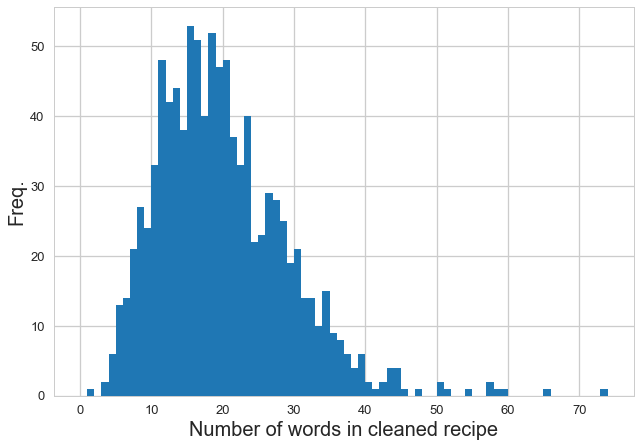

In [23]:
plt.hist(n_words, bins=np.arange(n_words.max()+1))
plt.xlabel('Number of words in cleaned recipe', fontsize=20)
plt.ylabel('Freq.', fontsize=20);
plt.savefig('fig/num_words.png')

Looks a bit like a Gamma distribution...

In [33]:
from scipy.stats import gamma

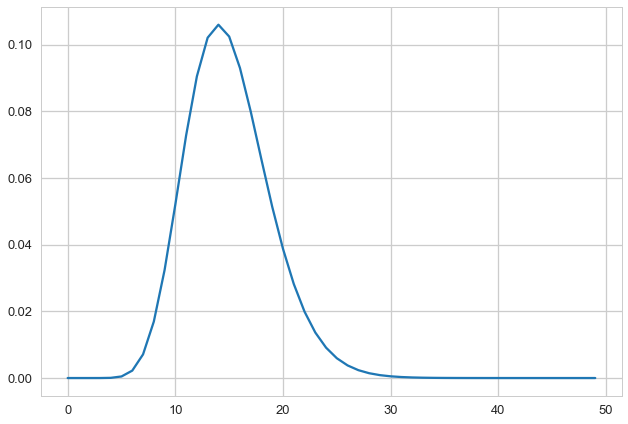

In [42]:
plt.plot(gamma.pdf(np.arange(0, 50), a=15));

## Perform TF-IDF

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 3),
                             min_df=10, stop_words='english',
                             max_features=256)

In [91]:
X = vectorizer.fit_transform(data['ingredients'])
X = X.toarray()

## Do dimensionality reduction on the TF-IDF scores

In [89]:
from sklearn.decomposition import PCA, NMF
from matplotlib.colors import LogNorm
from sklearn.metrics.pairwise import cosine_similarity

In [65]:
pca = PCA(n_components=2)
nmf = NMF(n_components=2)

In [92]:
pca_weights = pca.fit_transform(X)
nmf_weights = nmf.fit_transform(X)

In [98]:
np.random.seed(3124)
idx = np.random.choice(pca_weights.shape[0])
choice = pca_weights[idx]

similarity = cosine_similarity([X[idx]], X)[0]

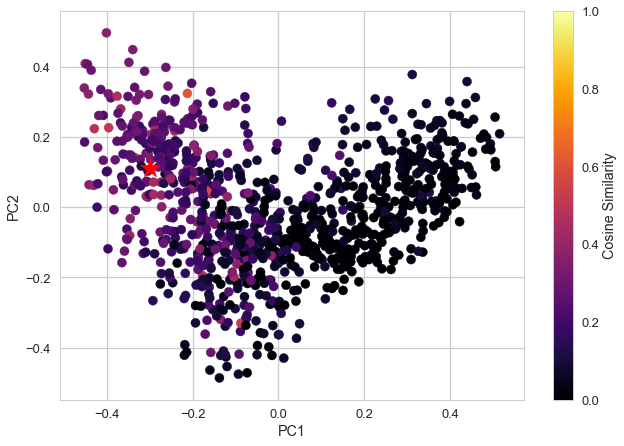

In [120]:
sc = plt.scatter(pca_weights[:, 0], pca_weights[:,1], c=similarity,cmap='inferno')
plt.scatter(choice[0], choice[1], marker='*', s=450, c='red')
plt.ylabel('PC2')
plt.xlabel('PC1')

plt.colorbar(sc, label='Cosine Similarity')
plt.savefig('fig/tfidf_pca.png')